In [28]:
import numpy as np
dims = np.int32(np.logspace(2, np.log10(4096), 30))


In [29]:
dims

array([ 100,  113,  129,  146,  166,  189,  215,  245,  278,  316,  359,
        408,  464,  528,  600,  682,  775,  881, 1001, 1138, 1294, 1470,
       1671, 1900, 2159, 2454, 2789, 3170, 3603, 4095])

In [30]:
from sklearn.datasets import fetch_openml
import numpy as np

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1)

# 数据和标签
X = mnist.data
y = mnist.target

# 准备一个空列表来收集每个类的索引
indices = []

# 对于每个类（0到9），选择最多100个样本
for i in range(10):  # 10个类
    class_indices = np.where(y == str(i))[0]
    selected_indices = np.random.choice(class_indices, 100, replace=False)
    indices.extend(selected_indices)

# 使用选定的索引来获取数据和标签
#
# X_selected = X[indices]
y_selected = y[indices]

# 现在X_selected和y_selected包含了每个类最多100个样本的数据和标签


In [31]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from sklearn.datasets import fetch_openml
import numpy as np

# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1, as_frame=True)

# 数据和标签
raw_data = mnist.data
raw_target = mnist.target

# 准备一个空列表来收集每个类的索引
indices = []

# 对于每个类（0到9），选择最多100个样本
for i in range(10):  # 10个类
    class_indices = np.where(raw_target == str(i))[0]
    if len(class_indices) >= 100:
        selected_indices = np.random.choice(class_indices, 100, replace=False)
        indices.extend(selected_indices)
    else:  # 如果某个类别不足100个样本，就取该类全部样本
        indices.extend(class_indices)

# 使用选定的索引来获取数据和标签
mnist_data= raw_data.iloc[indices]
mnist_target = raw_target.iloc[indices]

In [33]:
y_selected

61517    0
56377    0
48012    0
62492    0
9439     0
        ..
43114    9
40809    9
65968    9
27361    9
48634    9
Name: class, Length: 1000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [36]:

import matplotlib.pyplot as plt
import numpy as np

from sklearn.random_projection import SparseRandomProjection
from sklearn.model_selection import train_test_split
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn import metrics
from sklearn.svm import LinearSVC

import warnings
warnings.filterwarnings('ignore') # works
#warnings.filterwarnings(action='once') #does not work

def compare_SparseRandomProjection(data, target, dimension):
    
    #first get the train test split
    split = train_test_split(data, 
                             target, 
                             test_size = 0.2, 
                             random_state = 11
                             )
    (trainData, testData, trainTarget, testTarget) = split
    
    #calculate theorical Johnson Lindenstrauss K
    Eps = 0.2
    k = johnson_lindenstrauss_min_dim(dimension,eps=Eps)
    
    #calculate orignal accurcay with 10 times average.
    baseline = np.empty([11])
    for i in range(0,10):
        model = LinearSVC()
        model.fit(trainData, trainTarget)
        baseline[i] = metrics.accuracy_score(model.predict(testData), testTarget)
    baseline_avg = baseline[:].mean()
    
    #get 30 with logspace to avoid recalculate in high dim
    dims = np.int32(np.logspace(np.log10(2), np.log10(dimension), 30))

    #calculate each dim in dims use Sparse Random Projection
    
    #run it in realizations 25
    realizations = 25
    accuracies =np.empty([realizations, dimension+1])
    average_acc = []
    # Loop over the projection sizes, k
    for dim in dims:
        
        # average over realizations
        for i in range(realizations):
            # Create random projection
            sp = SparseRandomProjection(n_components = dim)
            X = sp.fit_transform(trainData)
    
            # Train classifier of your choice on the sparse random projection
            model = LinearSVC()
            model.fit(X, trainTarget)
    
            # Evaluate model and update accuracies
            test = sp.transform(testData)
            accuracies[i,dim]=(metrics.accuracy_score(model.predict(test), testTarget))

        average_acc.append(accuracies[:,dim].mean())   

    #plot the result
    plt.figure()
    plt.xlabel("# of dimensions k")
    plt.ylabel("AVG Accuracy")
    plt.xlim([2, dims[-1]])
    plt.ylim([0, 1])

    # Plot baseline and random projection accuracies
    plt.plot(dims, [baseline_avg] * len(average_acc), 
             color = "r", 
             label = "Orignal dimenson Average ACC"
             )
    plt.plot(dims, average_acc, label = 'Average ACC')
    """    
    plt.plot([k] * len(average_acc), 
             np.linspace(0,1,len(average_acc)), 
             label = 'John. Lind. K =' + str(k) +'eps = 0.2'
             )"""
    plt.legend()
    plt.show()
    
    return   
    

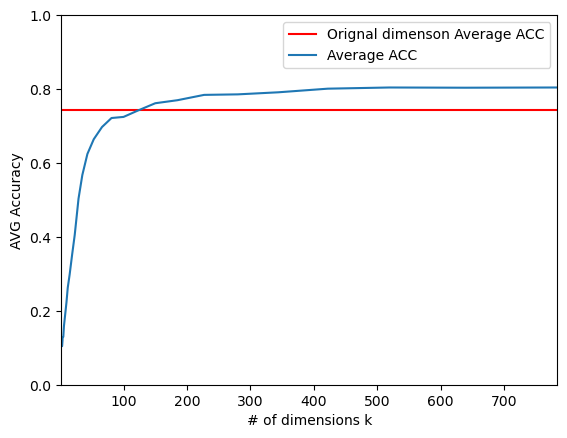

In [37]:
compare_SparseRandomProjection(mnist_data, mnist_target ,784)